IMPORTS

In [1]:
from datos_municipio import *
import pandas as pd
import seaborn as sns
from datos import *
import os
import requests
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import style
import json
from shapely.geometry import shape

CARGAR PAIS Y CIUDAD

In [2]:
spain = Pais("spain")
ciudad = spain.buscar_ciudad("Madrid")

In [3]:
archivo = pd.read_csv("Madrid/clasificador/Madrid_clasificador_elegidos_todo_agrupando6-2019_1-2023.csv")
lista = archivo["municipio"].unique().tolist()
for i in lista:
    mun = ciudad.buscar_municipio(i)
    wifis = wifis_rango(mun,0,4,2000,2019)
    print("Mun",mun.id,"wifis",len(wifis))

Mun El Álamo wifis 28
Mun Alcalá de Henares wifis 16170
Mun Alcobendas wifis 1410
Mun Alcorcón wifis 9033
Mun Aranjuez wifis 98
Mun Cercedilla wifis 18
Mun Colmenar Viejo wifis 537
Mun Collado Villalba wifis 87
Mun Coslada wifis 305
Mun El Escorial wifis 72
Mun Fuenlabrada wifis 193
Mun Getafe wifis 15468
Mun Hoyo de Manzanares wifis 78
Mun Leganés wifis 1847
Mun Majadahonda wifis 662
Mun Meco wifis 5
Mun Miraflores de la Sierra wifis 26
Mun El Molar wifis 7
Mun Moralzarzal wifis 21
Mun Móstoles wifis 8938
Mun Navacerrada wifis 5
Mun Navalcarnero wifis 65
Mun Parla wifis 151
Mun Pinto wifis 2907
Mun Pozuelo de Alarcón wifis 475
Mun Las Rozas de Madrid wifis 635
Mun San Agustín del Guadalix wifis 51
Mun San Fernando de Henares wifis 170
Mun San Sebastián de los Reyes wifis 459
Mun Torrejón de Ardoz wifis 1683
Mun Torrelaguna wifis 2
Mun Torrelodones wifis 343
Mun Valdemoro wifis 2476
Mun Tres Cantos wifis 4189


In [4]:
archivo = pd.read_csv("Madrid/clasificador/Madrid_clasificador_elegidos_todo_agrupando1-2000_4-2019.csv")
lista = archivo["municipio"].unique().tolist()
for i in lista:
    mun = ciudad.buscar_municipio(i)
    wifis = wifis_rango(mun,6,1,2019,2023)
    print("Mun",mun.id,"wifis",len(wifis))

Mun Alcalá de Henares wifis 16729
Mun Alcobendas wifis 762
Mun Alcorcón wifis 11719
Mun Arroyomolinos wifis 6
Mun Boadilla del Monte wifis 26
Mun El Boalo wifis 2
Mun Colmenar Viejo wifis 396
Mun Coslada wifis 396
Mun Fuenlabrada wifis 1126
Mun Getafe wifis 4672
Mun Leganés wifis 6346
Mun Majadahonda wifis 709
Mun Móstoles wifis 14726
Mun Parla wifis 488
Mun Pinto wifis 1745
Mun Pozuelo de Alarcón wifis 880
Mun Las Rozas de Madrid wifis 1845
Mun San Fernando de Henares wifis 160
Mun San Martín de la Vega wifis 97
Mun San Sebastián de los Reyes wifis 388
Mun Torrejón de Ardoz wifis 4581
Mun Torrelodones wifis 327
Mun Valdemoro wifis 1117
Mun Villanueva de la Cañada wifis 1
Mun Tres Cantos wifis 1509


FUNCIONES GRÁFICOS

In [2]:
def grafica_general_circular(archivo_nombre):
    archivo = pd.read_csv(archivo_nombre)
    archivo = archivo[archivo["tipo"] == "OPERADOR"]
    plot =(100 * archivo['operador'].value_counts() / len(archivo['operador'])).plot(
    kind='pie',autopct='%.2f',figsize=(6, 6), title='Operadores asociados')

def grafica_general_barras(archivo_nombre):
    archivo = pd.read_csv(archivo_nombre)
    archivo = archivo[archivo["tipo"] == "OPERADOR"]
    plot =(100 * archivo['operador'].value_counts() / len(archivo['operador'])).plot(
    kind='bar', title='Operadores asociados',edgecolor="black",linewidth=1)

def grafica_operador_municipio(archivo_nombre,operador="MOVISTAR"):
    archivo = pd.read_csv(archivo_nombre)
    archivo = archivo[archivo["tipo"] == "OPERADOR"]
    tabla = pd.crosstab(index=archivo["municipio"],columns=archivo["operador"]).apply(lambda r: r/r.sum()*100,axis=1)
    if operador == "ORANGE":
        color = "Orange"
    if operador == "MOVISTAR":
        color = "deepskyblue"
    if operador == "VODAFONE":
        color = "Red"
    if operador == "DIGI":
        color = "royalblue"
    grafica_d = tabla[operador].plot(kind="bar",title=f"Porcentaje de wifis de {operador} por municipio",color=color,edgecolor="black",linewidth=1)

def grafica_operador_municipio_apilado(archivo_nombre):
    archivo = pd.read_csv(archivo_nombre)
    archivo = archivo[archivo["tipo"] == "OPERADOR"]
    tabla = pd.crosstab(index=archivo["municipio"],columns=archivo["operador"]).apply(lambda r: r/r.sum()*100,axis=1)
    grafica = tabla.plot(kind="bar",title="Porcentaje operadoras por municipio",stacked=True)

def grafica_operador_renta(archivo_nombre):
    archivo = pd.read_csv(archivo_nombre)
    archivo = archivo[archivo["tipo"] == "OPERADOR"]
    grafica = sns.boxplot(x="operador", y="renta", data=archivo)

def grafica_operador_partido(archivo_nombre,operador="MOVISTAR",partido="DERECHA"):
    archivo = pd.read_csv(archivo_nombre)
    archivo = archivo[archivo["tipo"] == "OPERADOR"]
    archivo_filtrado = archivo[archivo["partido_ganador"] == partido]
    tabla = pd.crosstab(index=archivo_filtrado["municipio"],columns=archivo_filtrado['operador']).apply(lambda r: r/r.sum()*100,axis=1)
    if operador == "ORANGE":
        color = "Orange"
    if operador == "MOVISTAR":
        color = "deepskyblue"
    if operador == "VODAFONE":
        color = "Red"
    if operador == "DIGI":
        color = "royalblue"
    grafica_d = tabla[operador].plot(kind="bar",title=f"Porcentaje de wifis de {operador} cuando gana la {partido}",color=color,edgecolor="black",linewidth=1)

def graficas_agrupado(archivo_nombre):
    operador = ["MOVISTAR","ORANGE","VODAFONE","DIGI","MASMOVIL"]
    partido = ["DERECHA","IZQUIERDA"]
    grafica_general_circular(archivo_nombre)
    grafica_general_barras(archivo_nombre)
    grafica_operador_renta(archivo_nombre)
    for i in operador:
        grafica_operador_municipio(archivo_nombre,i)
        for j in partido:
            grafica_operador_partido(archivo_nombre,i,j)

In [3]:
def grafica_operador_media_partido(archivo_nombre,operador="MOVISTAR"):
    archivo = pd.read_csv(archivo_nombre)
    archivo = archivo[archivo["tipo"] == "OPERADOR"]
    archivo_filtrado = archivo[archivo["partido_ganador"] == "DERECHA"]
    tabla = pd.crosstab(index=archivo_filtrado["municipio"],columns=archivo_filtrado['operador']).apply(lambda r: r/r.sum()*100,axis=1)
    porcentaje_operador_derecha = tabla[operador].mean()

    archivo_filtrado = archivo[archivo["partido_ganador"] == "IZQUIERDA"]
    tabla = pd.crosstab(index=archivo_filtrado["municipio"],columns=archivo_filtrado['operador']).apply(lambda r: r/r.sum()*100,axis=1)
    porcentaje_operador_izq = tabla[operador].mean()
    x = ["GANA LA IZQUIERDA","GANA LA DERECHA"]
    y = [porcentaje_operador_izq,porcentaje_operador_derecha]
    if operador == "ORANGE":
        color = "Orange"
    if operador == "MOVISTAR":
        color = "deepskyblue"
    if operador == "VODAFONE":
        color = "Red"
    if operador == "DIGI":
        color = "royalblue"
    fig, ax = plt.subplots(figsize=(4,4))
    ax.bar(x = x, height = y,color= color,edgecolor="black",linewidth=1)
    ax.set_title(f"% {operador} medio en municipios")

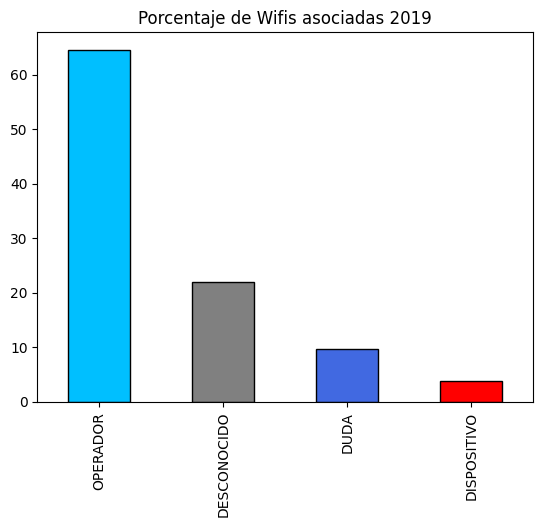

In [4]:
archivo = pd.read_csv("Madrid/clasificador/Madrid_clasificador_elegidos_todo_agrupando1-2000_4-2019.csv")
plot =(100 * archivo['tipo'].value_counts() / len(archivo['tipo'])).plot(
kind='bar', title='Porcentaje de Wifis asociadas 2019',color=['deepskyblue', 'gray', 'royalblue', 'red'],edgecolor="black",linewidth=1)

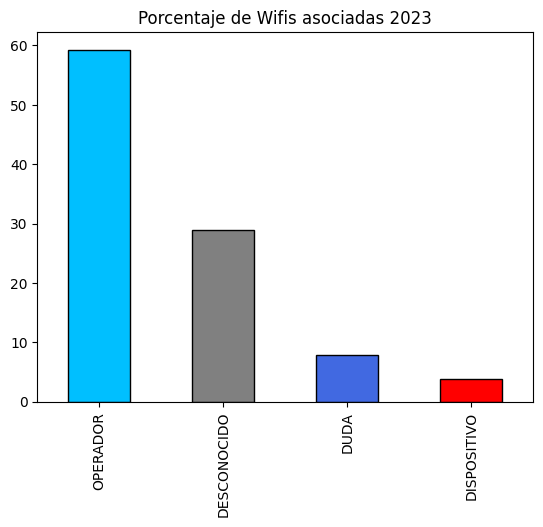

In [3]:
archivo = pd.read_csv("Madrid/clasificador/Madrid_clasificador_elegidos_todo_agrupando6-2019_1-2023.csv")
plot =(100 * archivo['tipo'].value_counts() / len(archivo['tipo'])).plot(
kind='bar', title='Porcentaje de Wifis asociadas 2023',color=['deepskyblue', 'gray', 'royalblue', 'red'],edgecolor="black",linewidth=1)

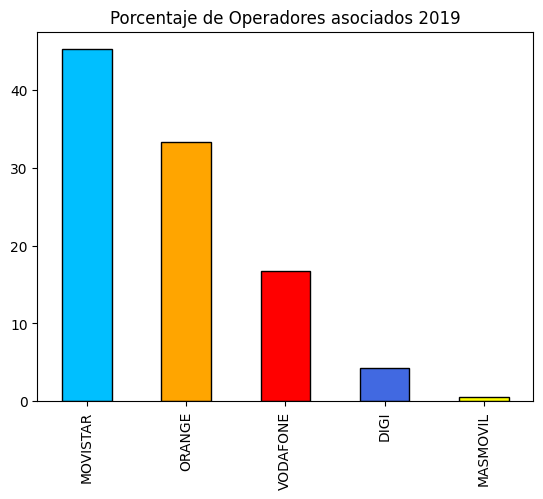

In [48]:
archivo = pd.read_csv("Madrid/clasificador/Madrid_clasificador_elegidos_todo_agrupando1-2000_4-2019.csv")
archivo = archivo[archivo["tipo"] == "OPERADOR"]
plot =(100 * archivo['operador'].value_counts() / len(archivo['operador'])).plot(
kind='bar', title='Porcentaje de Operadores asociados 2019',color=['deepskyblue', 'orange', 'red', 'royalblue','yellow'],edgecolor="black",linewidth=1)

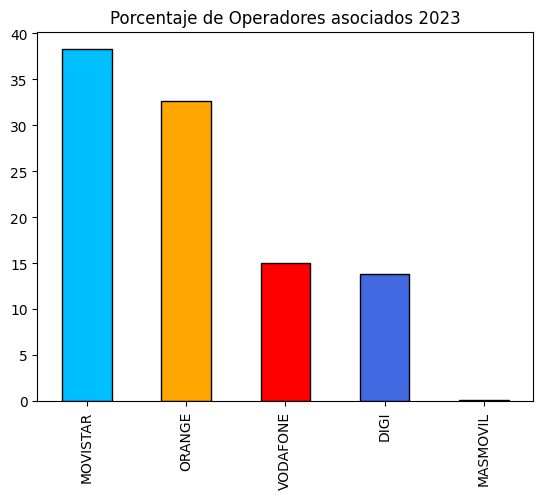

In [2]:
archivo = pd.read_csv("Madrid/clasificador/Madrid_clasificador_elegidos_todo_agrupando6-2019_1-2023.csv")
archivo = archivo[archivo["tipo"] == "OPERADOR"]
plot =(100 * archivo['operador'].value_counts() / len(archivo['operador'])).plot(
kind='bar', title='Porcentaje de Operadores asociados 2023',color=['deepskyblue', 'orange', 'red', 'royalblue','yellow'],edgecolor="black",linewidth=1)

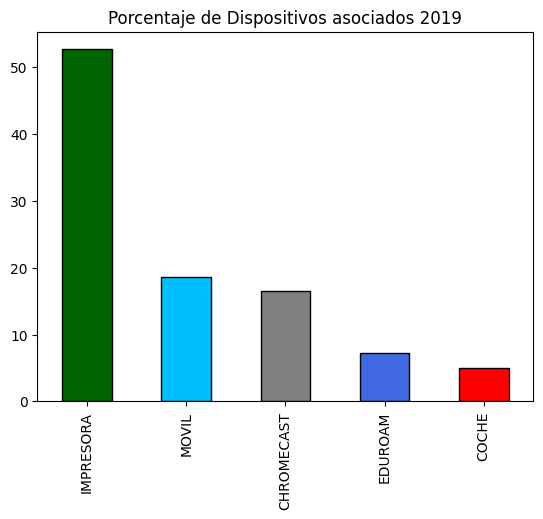

In [54]:
archivo = pd.read_csv("Madrid/clasificador/Madrid_clasificador_elegidos_todo_agrupando1-2000_4-2019.csv")
archivo = archivo[archivo["tipo"] == "DISPOSITIVO"]
plot =(100 * archivo['dispositivo'].value_counts() / len(archivo['dispositivo'])).plot(
kind='bar', title='Porcentaje de Dispositivos asociados 2019',color=['darkgreen', 'deepskyblue', 'gray', 'royalblue','red'],edgecolor="black",linewidth=1)

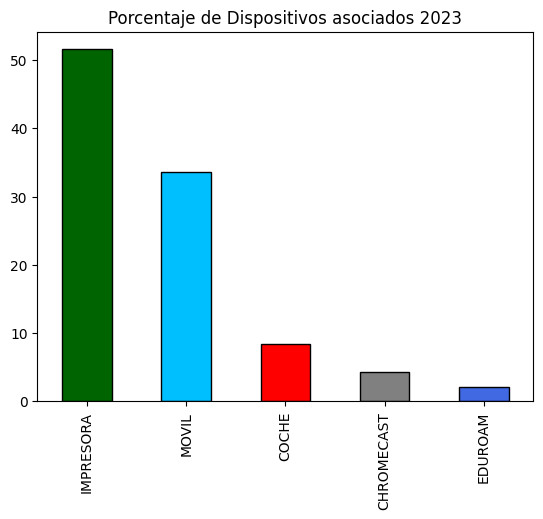

In [40]:
archivo = pd.read_csv("Madrid/clasificador/Madrid_clasificador_elegidos_todo_agrupando6-2019_1-2023.csv")
archivo = archivo[archivo["tipo"] == "DISPOSITIVO"]
plot =(100 * archivo['dispositivo'].value_counts() / len(archivo['dispositivo'])).plot(
kind='bar', title='Porcentaje de Dispositivos asociados 2023',color=['darkgreen', 'deepskyblue','red', 'gray', 'royalblue'],edgecolor="black",linewidth=1)

ANÁLISIS 2019

In [4]:
archivo = pd.read_csv("Madrid/clasificador/Madrid_clasificador_elegidos_todo_agrupando1-2000_4-2019.csv")
archivo = archivo[archivo["tipo"] == "OPERADOR"]
tabla = pd.crosstab(index=archivo["municipio"],columns=archivo["operador"]).apply(lambda r: r/r.sum()*100,axis=1)
print(tabla)

operador                         DIGI  MASMOVIL   MOVISTAR     ORANGE  \
municipio                                                               
Alcalá de Henares            4.822401  0.535822  42.952208  33.739521   
Alcobendas                   0.878735  0.000000  74.692443  14.411248   
Alcorcón                     2.436156  1.226478  38.440860  38.659274   
Arroyomolinos                0.000000  0.000000  79.487179   5.128205   
Boadilla del Monte           3.571429  0.000000  57.142857  30.357143   
Colmenar Viejo               2.287582  1.633987  57.189542  25.490196   
Coslada                      2.500000  0.000000  61.666667  19.166667   
El Boalo                     3.529412  0.000000  61.176471  16.470588   
Fuenlabrada                  6.976744  0.000000  39.534884  30.232558   
Getafe                       3.253896  0.238313  50.705775  31.558203   
Las Rozas de Madrid          1.612903  0.403226  65.322581  22.177419   
Leganés                      1.778907  0.381194  47

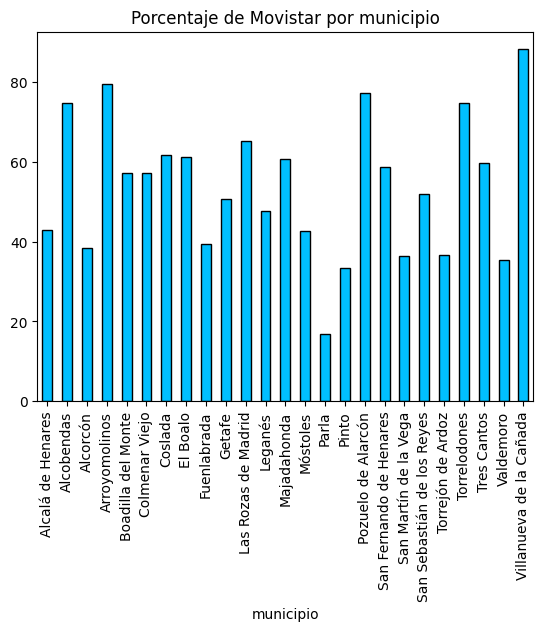

In [6]:
grafica = tabla["MOVISTAR"].plot(kind="bar",title="Porcentaje de Movistar por municipio",color="deepskyblue",edgecolor="black",linewidth=1)

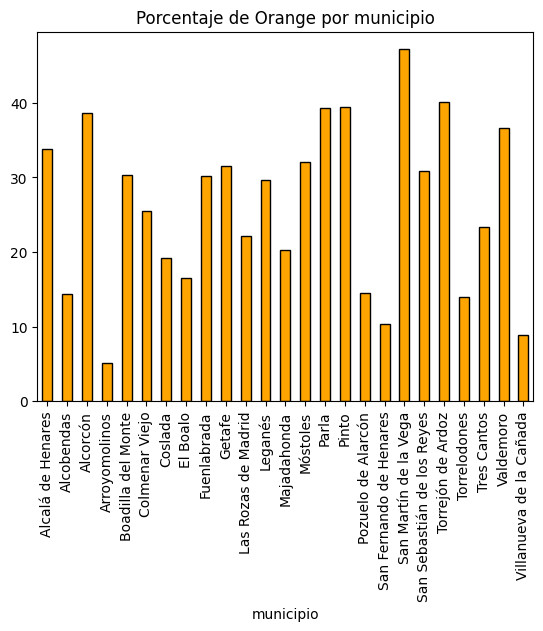

In [7]:
grafica = tabla["ORANGE"].plot(kind="bar",title="Porcentaje de Orange por municipio",color="Orange",edgecolor="black",linewidth=1)

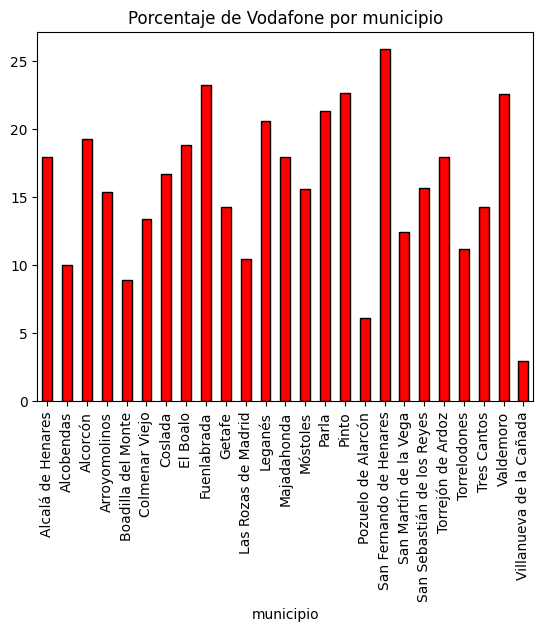

In [8]:
grafica = tabla["VODAFONE"].plot(kind="bar",title="Porcentaje de Vodafone por municipio",color="Red",edgecolor="black",linewidth=1)

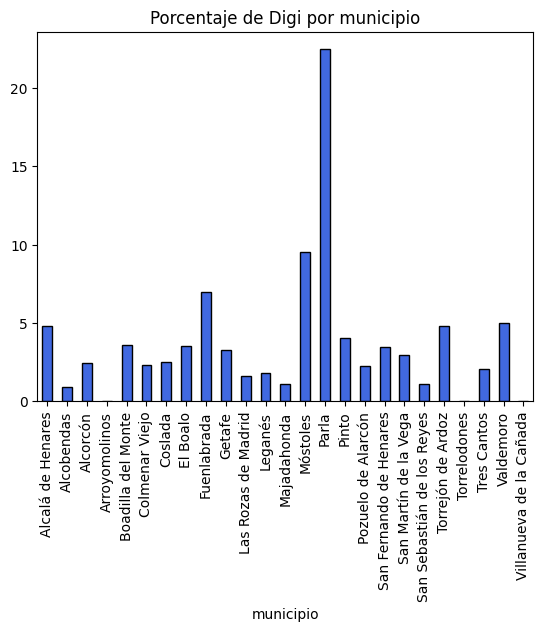

In [9]:
grafica = tabla["DIGI"].plot(kind="bar",title="Porcentaje de Digi por municipio",color="Royalblue",edgecolor="black",linewidth=1)

ANALISIS CON PARTIDOS ELECTORALES

MOVISTAR

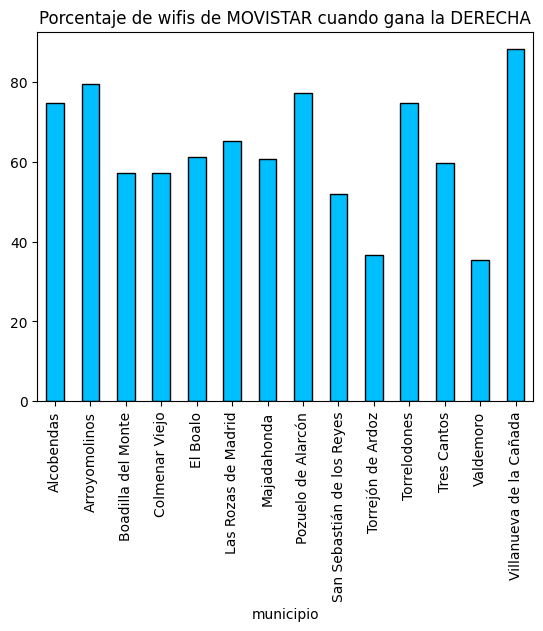

In [10]:
grafica_operador_partido("Madrid/clasificador/Madrid_clasificador_elegidos_todo_agrupando1-2000_4-2019.csv")

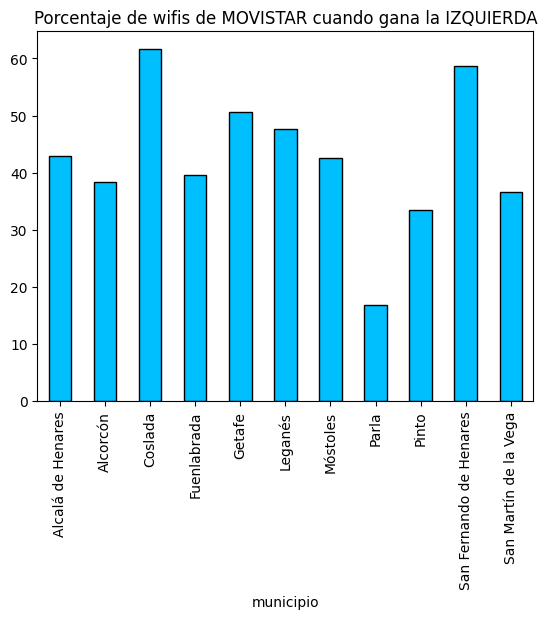

In [11]:
grafica_operador_partido("Madrid/clasificador/Madrid_clasificador_elegidos_todo_agrupando1-2000_4-2019.csv",partido="IZQUIERDA")

ORANGE

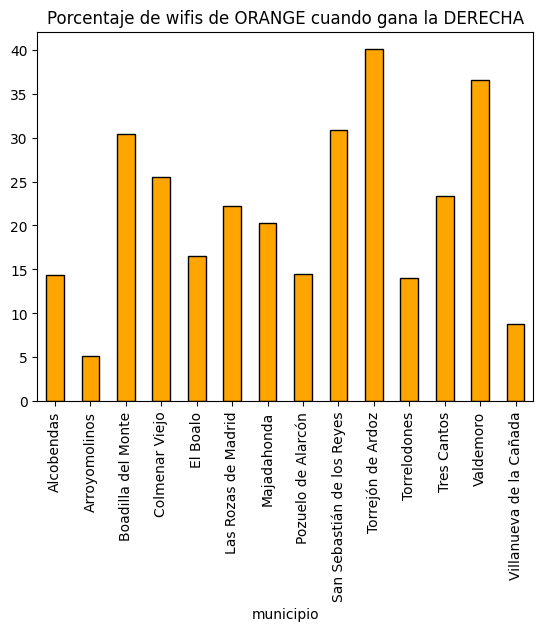

In [12]:
grafica_operador_partido("Madrid/clasificador/Madrid_clasificador_elegidos_todo_agrupando1-2000_4-2019.csv",operador="ORANGE")

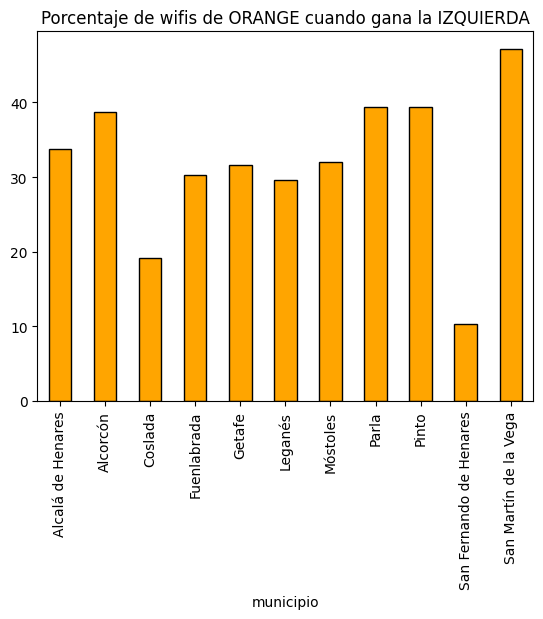

In [13]:
grafica_operador_partido("Madrid/clasificador/Madrid_clasificador_elegidos_todo_agrupando1-2000_4-2019.csv",operador="ORANGE",partido="IZQUIERDA")

VODAFONE

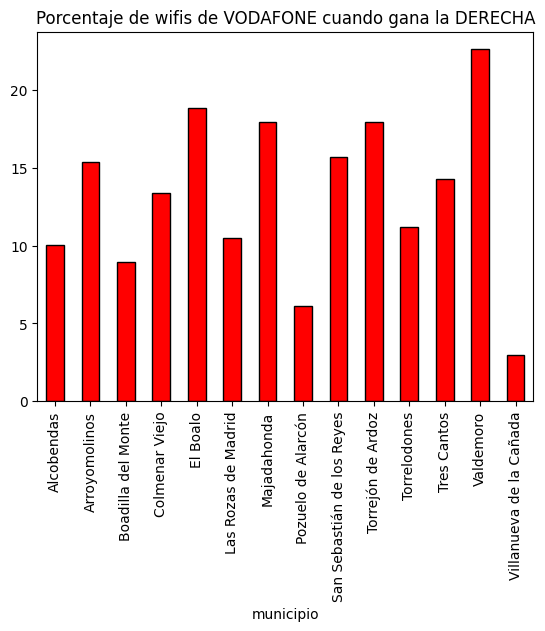

In [14]:
grafica_operador_partido("Madrid/clasificador/Madrid_clasificador_elegidos_todo_agrupando1-2000_4-2019.csv",operador="VODAFONE")

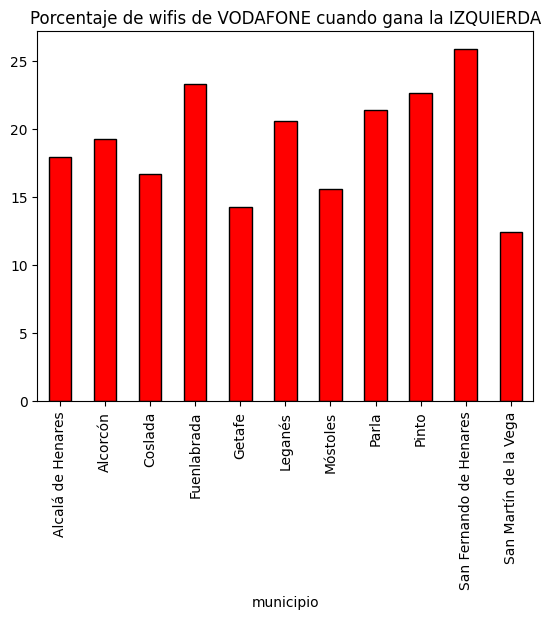

In [15]:
grafica_operador_partido("Madrid/clasificador/Madrid_clasificador_elegidos_todo_agrupando1-2000_4-2019.csv",operador="VODAFONE",partido="IZQUIERDA")

DIGI

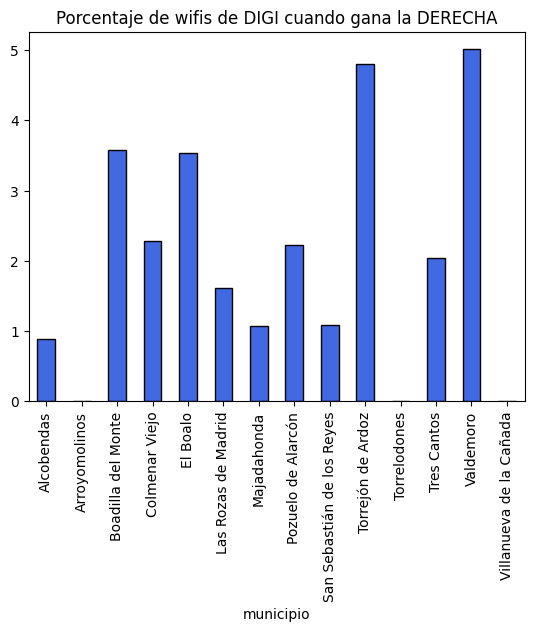

In [16]:
grafica_operador_partido("Madrid/clasificador/Madrid_clasificador_elegidos_todo_agrupando1-2000_4-2019.csv",operador="DIGI")

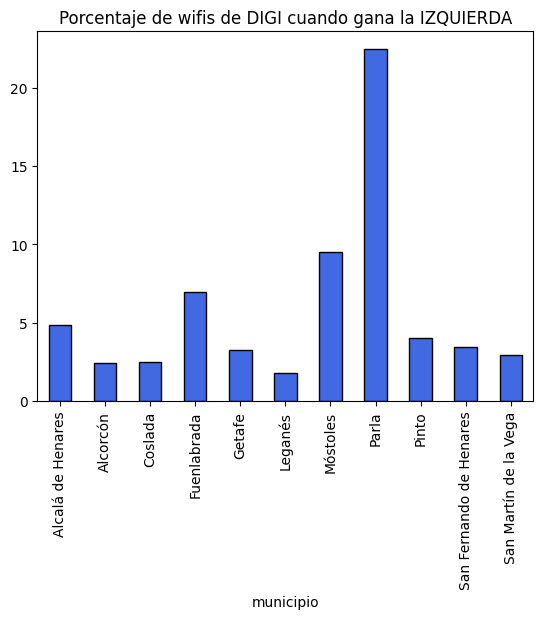

In [17]:
grafica_operador_partido("Madrid/clasificador/Madrid_clasificador_elegidos_todo_agrupando1-2000_4-2019.csv",operador="DIGI",partido="IZQUIERDA")

COMPARACION % MEDIO DERECHA VS IZQUIERDA

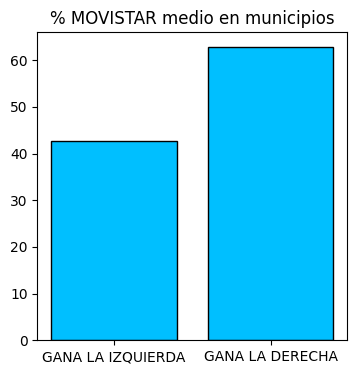

In [18]:
grafica_operador_media_partido("Madrid/clasificador/Madrid_clasificador_elegidos_todo_agrupando1-2000_4-2019.csv")

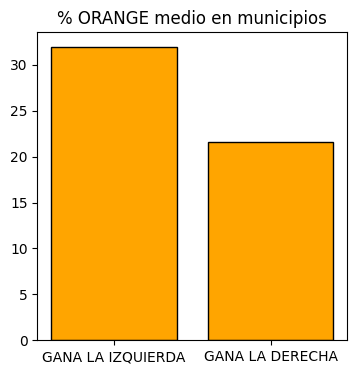

In [19]:
grafica_operador_media_partido("Madrid/clasificador/Madrid_clasificador_elegidos_todo_agrupando1-2000_4-2019.csv",operador="ORANGE")

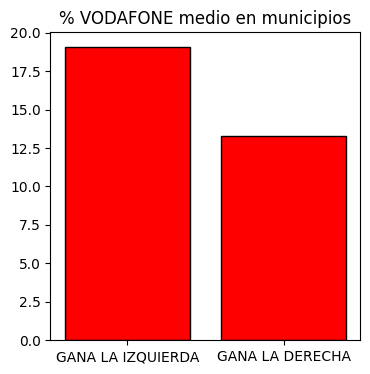

In [20]:
grafica_operador_media_partido("Madrid/clasificador/Madrid_clasificador_elegidos_todo_agrupando1-2000_4-2019.csv",operador="VODAFONE")

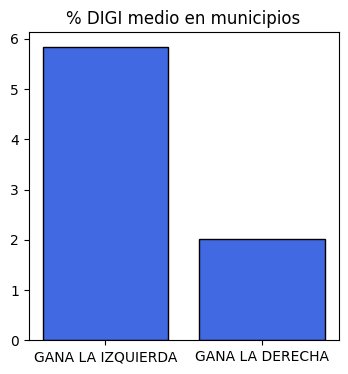

In [21]:
grafica_operador_media_partido("Madrid/clasificador/Madrid_clasificador_elegidos_todo_agrupando1-2000_4-2019.csv",operador="DIGI")

ANALISIS 2023

In [22]:
archivo = pd.read_csv("Madrid/clasificador/Madrid_clasificador_elegidos_todo_agrupando6-2019_1-2023.csv")
archivo = archivo[archivo["tipo"] == "OPERADOR"]
tabla = pd.crosstab(index=archivo["municipio"],columns=archivo["operador"]).apply(lambda r: r/r.sum()*100,axis=1)
print(tabla)

operador                         DIGI  MASMOVIL   MOVISTAR     ORANGE  \
municipio                                                               
Alcalá de Henares           19.128395  0.072183  37.192096  31.155824   
Alcobendas                   3.550296  0.000000  69.822485  13.609467   
Alcorcón                     8.871328  0.342925  37.035933  38.825108   
Aranjuez                     5.263158  0.000000  32.894737  47.368421   
Cercedilla                   4.109589  0.000000  54.794521  34.246575   
Collado Villalba             4.878049  0.000000  45.121951  36.382114   
Colmenar Viejo               4.424779  0.442478  42.477876  36.725664   
Coslada                     15.151515  0.505051  41.919192  27.777778   
El Escorial                  1.333333  0.000000  64.000000  24.000000   
El Molar                    16.929134  0.000000  39.763780  31.102362   
El Álamo                    10.937500  0.000000  34.375000  42.187500   
Fuenlabrada                 17.194570  0.000000  34

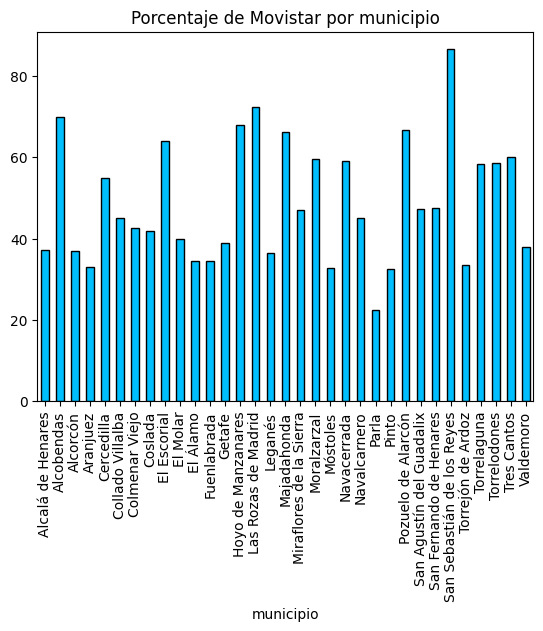

In [23]:
grafica = tabla["MOVISTAR"].plot(kind="bar",title="Porcentaje de Movistar por municipio",color="deepskyblue",edgecolor="black",linewidth=1)

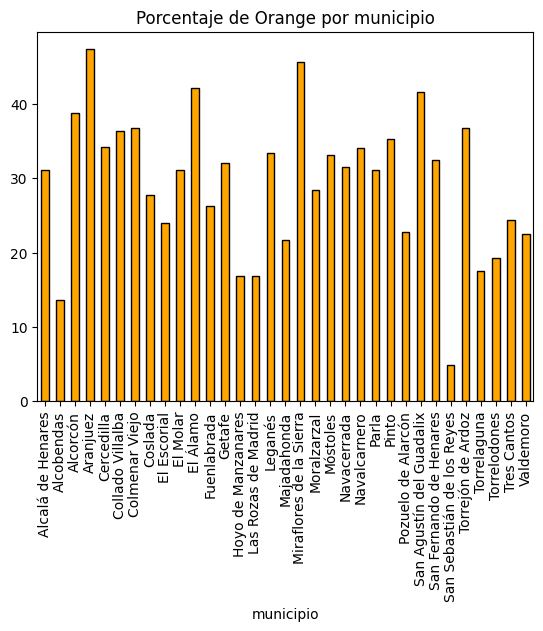

In [24]:
grafica = tabla["ORANGE"].plot(kind="bar",title="Porcentaje de Orange por municipio",color="orange",edgecolor="black",linewidth=1)

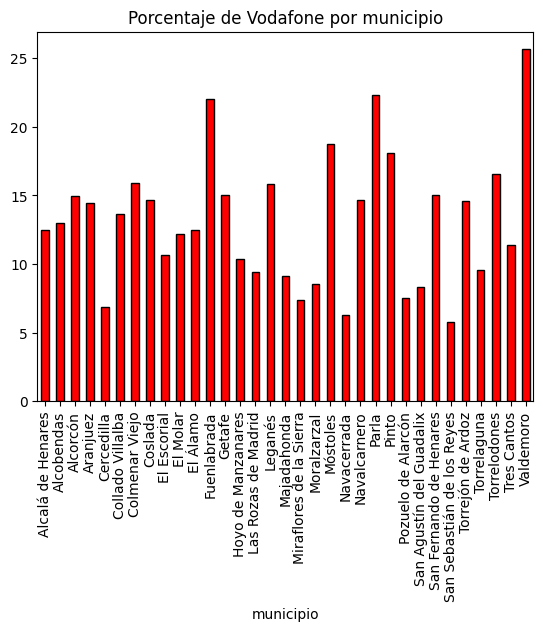

In [25]:
grafica = tabla["VODAFONE"].plot(kind="bar",title="Porcentaje de Vodafone por municipio",color="red",edgecolor="black",linewidth=1)

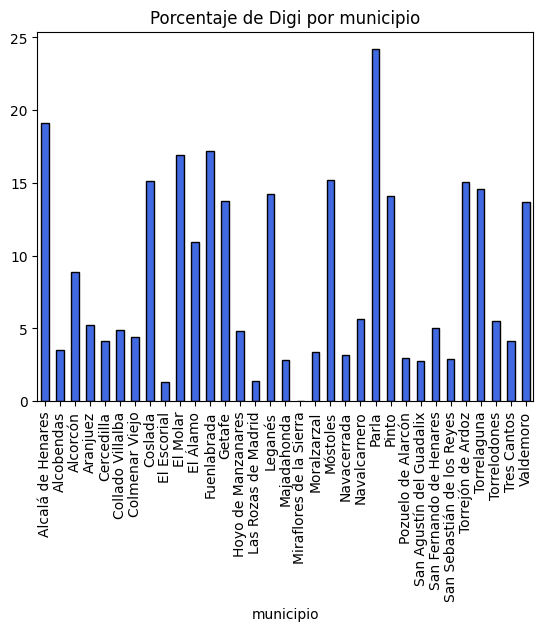

In [26]:
grafica = tabla["DIGI"].plot(kind="bar",title="Porcentaje de Digi por municipio",color="royalblue",edgecolor="black",linewidth=1)

ANALISIS CON RESULTADOS ELECTORALES

MOVISTAR

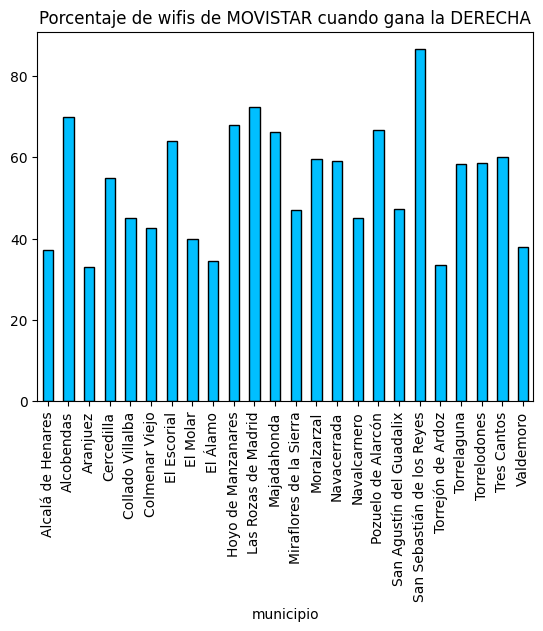

In [27]:
grafica_operador_partido("Madrid/clasificador/Madrid_clasificador_elegidos_todo_agrupando6-2019_1-2023.csv")

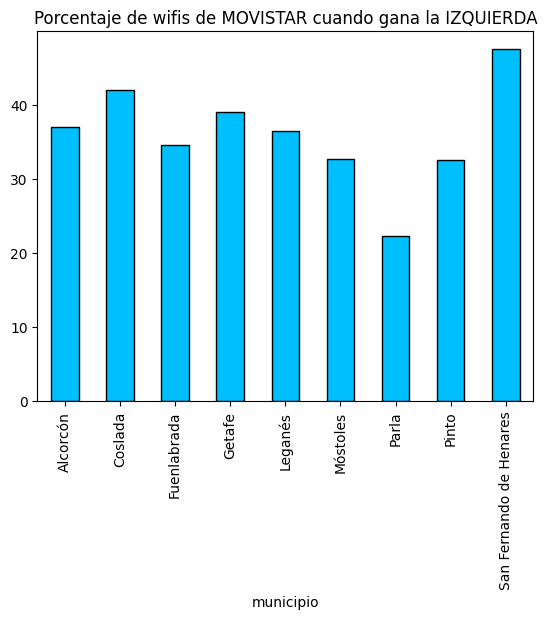

In [28]:
grafica_operador_partido("Madrid/clasificador/Madrid_clasificador_elegidos_todo_agrupando6-2019_1-2023.csv",partido="IZQUIERDA")

ORANGE

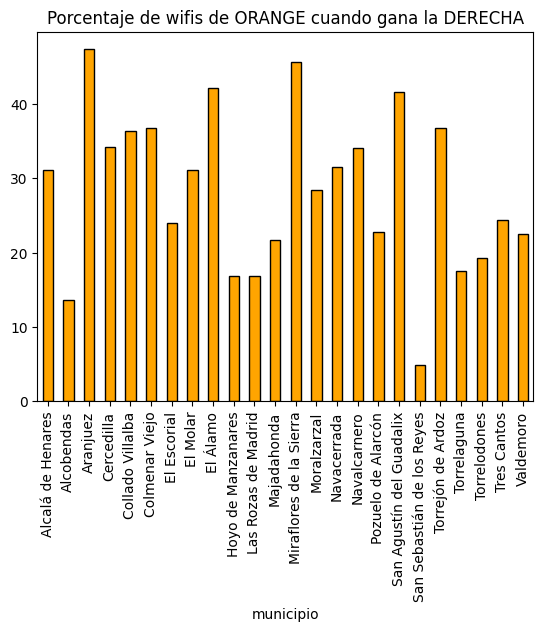

In [29]:
grafica_operador_partido("Madrid/clasificador/Madrid_clasificador_elegidos_todo_agrupando6-2019_1-2023.csv",operador="ORANGE")

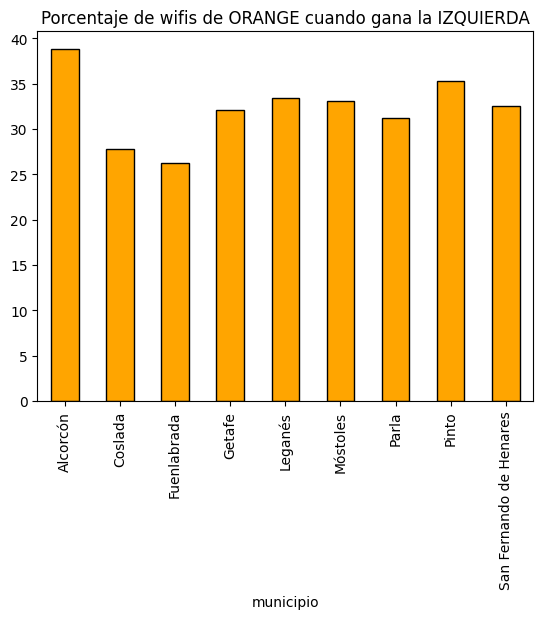

In [30]:
grafica_operador_partido("Madrid/clasificador/Madrid_clasificador_elegidos_todo_agrupando6-2019_1-2023.csv",operador="ORANGE",partido="IZQUIERDA")

VODAFONE

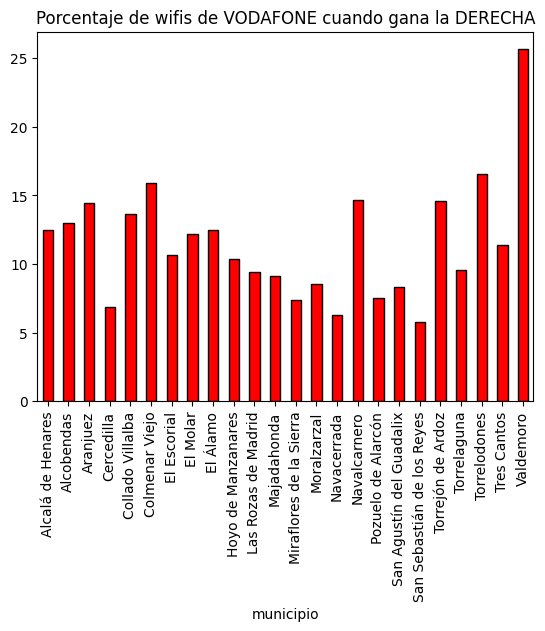

In [31]:
grafica_operador_partido("Madrid/clasificador/Madrid_clasificador_elegidos_todo_agrupando6-2019_1-2023.csv",operador="VODAFONE")

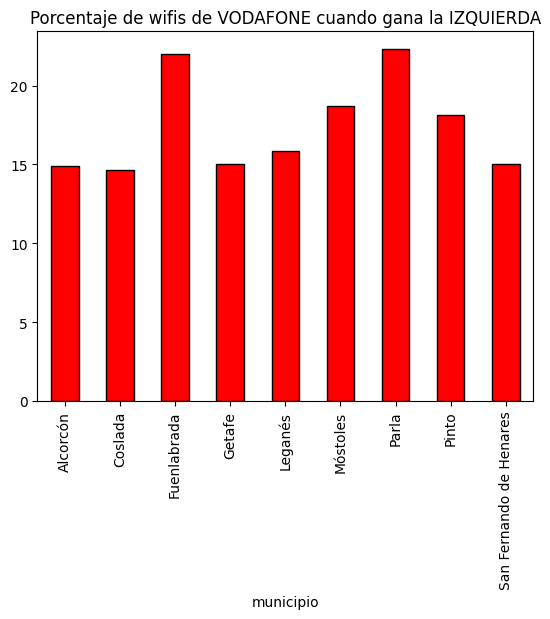

In [32]:
grafica_operador_partido("Madrid/clasificador/Madrid_clasificador_elegidos_todo_agrupando6-2019_1-2023.csv",operador="VODAFONE",partido="IZQUIERDA")

DIGI

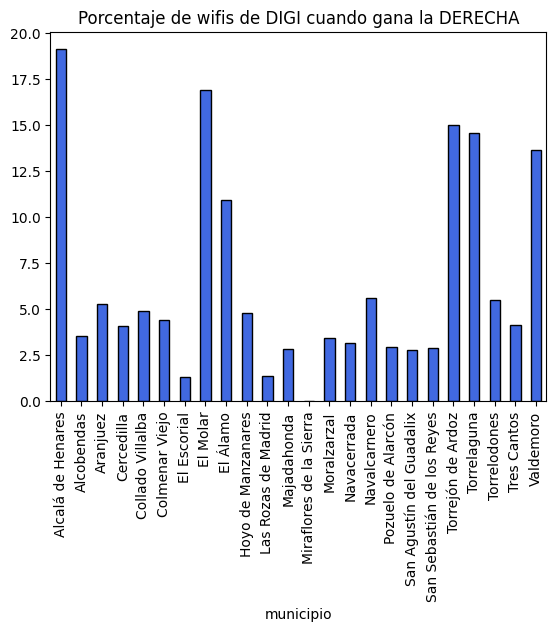

In [33]:
grafica_operador_partido("Madrid/clasificador/Madrid_clasificador_elegidos_todo_agrupando6-2019_1-2023.csv",operador="DIGI")

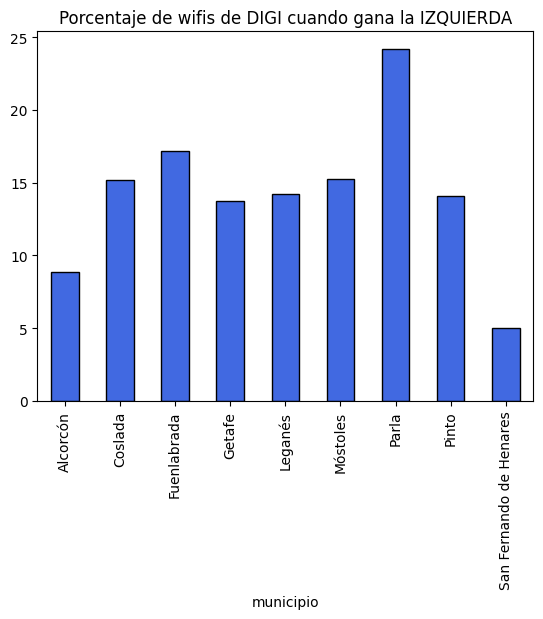

In [34]:
grafica_operador_partido("Madrid/clasificador/Madrid_clasificador_elegidos_todo_agrupando6-2019_1-2023.csv",operador="DIGI",partido="IZQUIERDA")

COMPARACIÓN % MEDIO DERECHA VS IZQUIERDA

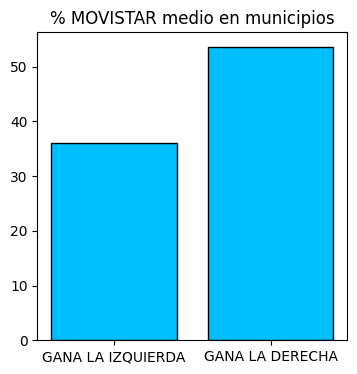

In [35]:
grafica_operador_media_partido("Madrid/clasificador/Madrid_clasificador_elegidos_todo_agrupando6-2019_1-2023.csv")

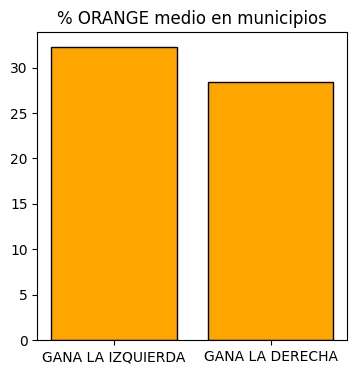

In [37]:
grafica_operador_media_partido("Madrid/clasificador/Madrid_clasificador_elegidos_todo_agrupando6-2019_1-2023.csv",operador="ORANGE")

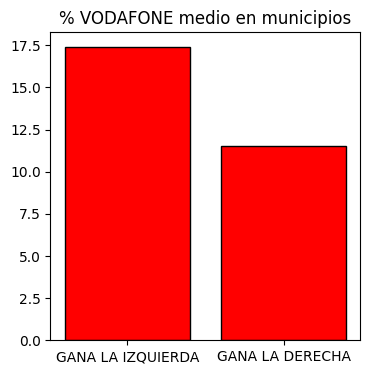

In [39]:
grafica_operador_media_partido("Madrid/clasificador/Madrid_clasificador_elegidos_todo_agrupando6-2019_1-2023.csv",operador="VODAFONE")

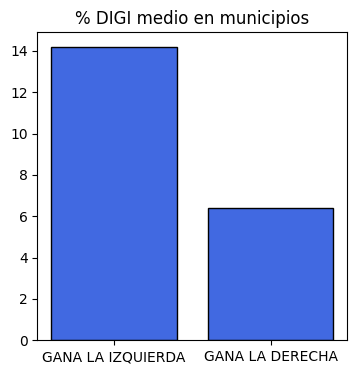

In [38]:
grafica_operador_media_partido("Madrid/clasificador/Madrid_clasificador_elegidos_todo_agrupando6-2019_1-2023.csv",operador="DIGI")